---

# Ensemble - Bagging, Random Forests and Boosting

Ensemble learning is a general meta approach to machine learning that seeks better predictive performance by combining the predictions from multiple models.

The three main classes of ensemble learning methods are bagging, random forests(stacking) and boosting.

- Bagging involves fitting many decision trees on different samples of the same dataset and averaging the predictions.

- Stacking involves fitting many different models types on the same data and using another model to learn how to best combine the predictions.

- Boosting involves adding ensemble members sequentially that correct the predictions made by prior models and outputs a weighted average of the predictions.

## 1. Bagging

### Introduction

Bagging, also known as Bootstrap aggregating, is an ensemble learning technique that helps to improve the performance and accuracy of machine learning algorithms. It is used to deal with bias-variance trade-offs and reduces the variance of a prediction model. Bagging avoids overfitting of data and is used for both regression and classification models, specifically for decision tree algorithms.

Bootstrapping is the method of randomly creating samples of data out of a population with replacement to estimate a population parameter.

<p>
    <img src="Bagging.png" width="500" align="center">
</p>

### Steps to perform bagging

1. Consider there are n observations and m features in the training set. You need to select a random sample from the training dataset without replacement

2. A subset of m features is chosen randomly to create a model using sample observations

3. The feature offering the best split out of the lot is used to split the nodes

4. The tree is grown, so you have the best root nodes

5. The above steps are repeated n times. It aggregates the output of individual decision trees to give the best prediction

### Advantages

1. Bagging minimizes the overfitting of data
2. It improves the model’s accuracy
3. It deals with higher dimensional data efficiently

---

### Implement

We will still consider the classification dataset to illustrate this concept, and we willcompare the performance between a single decision tree model and a bagging classifier of many depth 1 decision trees, referred to as decision stumps. 

First, visualize the data.


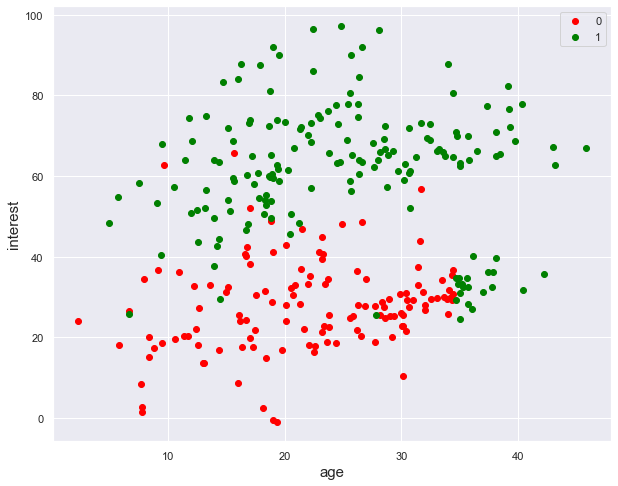

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("classification.csv")

results = [0.0, 1.0]
colors = ["red", "green"]
fig, ax = plt.subplots(figsize = (10, 8))
for results, colors in zip(results, colors):
    temp_df = df[df.success == results]
    ax.scatter(temp_df.age,
               temp_df.interest,
               c = colors,
               label = int(results), 
               )
    
ax.set_xlabel("age", fontsize = 15)
ax.set_ylabel("interest", fontsize = 15)
ax.legend()
plt.show()

Next, we split the dataset and compare a decision tree.

In [8]:
X = df[["age", "interest"]].to_numpy()
y = df["success"].to_numpy()
y = y.astype(int)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        42
           1       0.98      0.84      0.91        77

    accuracy                           0.89       119
   macro avg       0.88      0.91      0.89       119
weighted avg       0.91      0.89      0.89       119
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        42
           1       0.99      0.91      0.95        77

    accuracy                           0.93       119
   macro avg       0.92      0.94      0.93       119
weighted avg       0.94      0.93      0.93       119
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.79      0.98      0.87        42
           1       0.99      0.86      0.92        77

    accuracy                           0.90       119
   macro avg       0.89      0.92      

The precision of lable "1" of decision tree with max-depth-3 is the largest compared to the other methods. The precision of lable "0" of bagging is the largest compared to the other methods. 

Then, we plot the decision boundaries of decision tree model and bagging model.


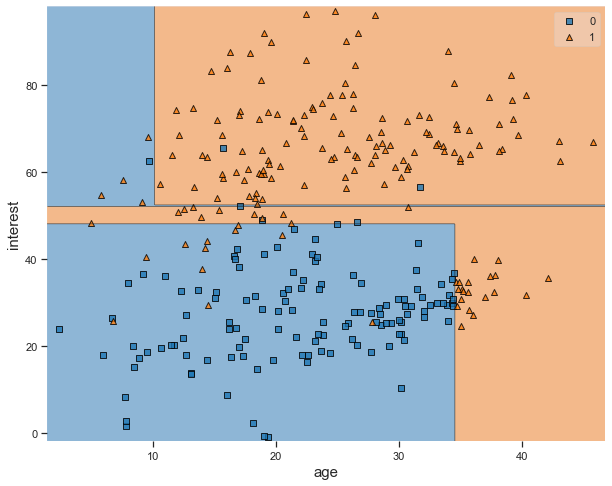

In [9]:
from mlxtend.plotting import plot_decision_regions

## Decision Tree
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("age", fontsize = 15)
plt.ylabel("interest", fontsize = 15)
plt.grid()
plt.show()

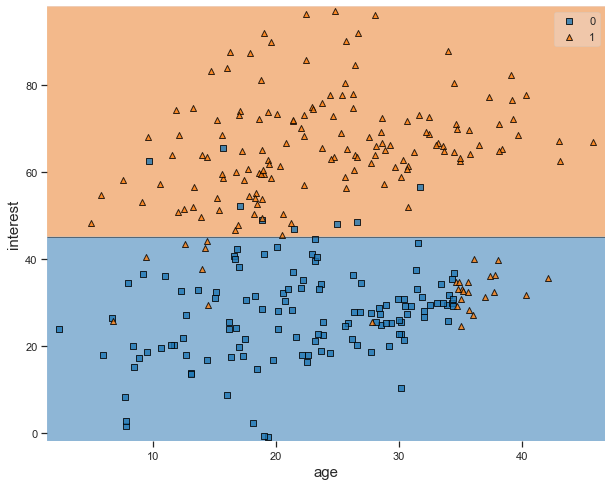

In [10]:
## Bagging 
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("age", fontsize = 15)
plt.ylabel("interest", fontsize = 15)
plt.grid()
plt.show()

---

## 2. Random Forests

### Introduction

A random forest is a machine learning technique that’s used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.

A random forest algorithm consists of many decision trees. The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating. Bagging is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms.

The (random forest) algorithm establishes the outcome based on the predictions of the decision trees. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.

A random forest eradicates the limitations of a decision tree algorithm. It reduces the overfitting of datasets and increases precision. It generates predictions without requiring many configurations in packages (like scikit-learn).

<p>
    <img src="random-forests.png" width="500" align="center">
</p>

### Features

1. It’s more accurate than the decision tree algorithm.
2. It provides an effective way of handling missing data.
3. It can produce a reasonable prediction without hyper-parameter tuning.
4. It solves the issue of overfitting in decision trees.
5. In every random forest tree, a subset of features is selected randomly at the node’s splitting point.

### Implement

First, we compare the three models, decision tree, bagging and random forests.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        42
           1       0.99      0.91      0.95        77

    accuracy                           0.93       119
   macro avg       0.92      0.94      0.93       119
weighted avg       0.94      0.93      0.93       119
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.79      0.98      0.87        42
           1       0.99      0.86      0.92        77

    accuracy                           0.90       119
   macro avg       0.89      0.92      0.89       119
weighted avg       0.92      0.90      0.90       119
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.79      0.98      0.87        42
           1       0.99      0.86      0.92        77

    accuracy                           0.90       119
   macro avg       0.89      0.92     

The precision of bagging model is same as forest classification.

Last, let's view the decision regions generated by the following cell.

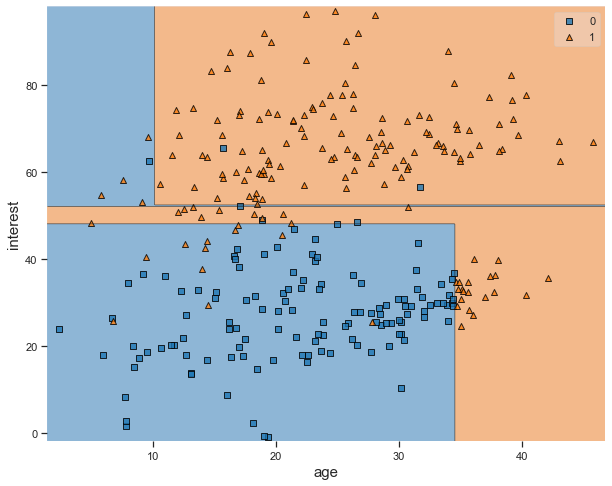

In [24]:
## decision tree
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("age", fontsize = 15)
plt.ylabel("interest", fontsize = 15)
plt.grid()
plt.show()

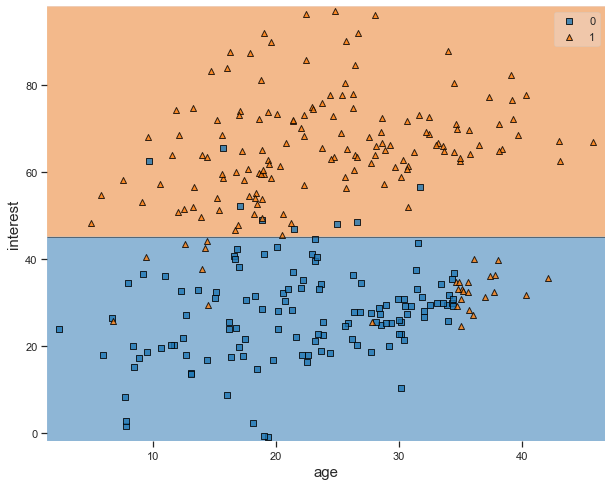

In [25]:
## bagging
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("age", fontsize = 15)
plt.ylabel("interest", fontsize = 15)
plt.grid()
plt.show()

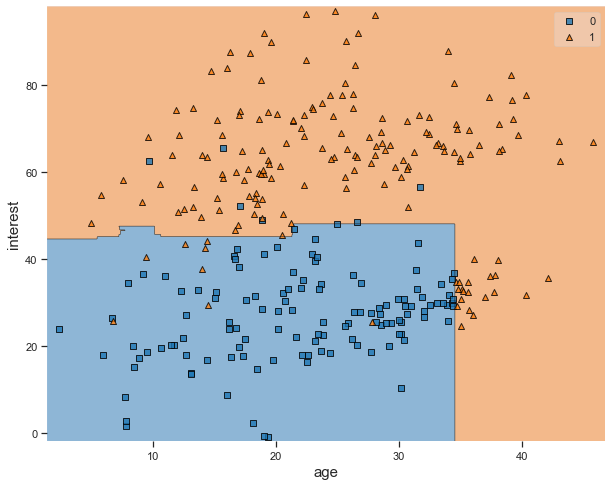

In [26]:
## random forecast
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("age", fontsize = 15)
plt.ylabel("interest", fontsize = 15)
plt.grid()
plt.show()

From the decision boundaries plots, it looks like that the random forests is better than bagging.

### Feature Importance

One cool thing about random forests is that these models make it simple to measure feature importance of each feature. Scikit-Learn does this by measuring a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average across all trees in the forest.

In [27]:
names = ["age", "interest"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

age 0.3005534655408015
interest 0.6994465344591986


The interest feature is more important than the feature age.

---

## 3. Boosting 

### Introduction

Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors. In boosting, a random sample of data is selected, fitted with a model and then trained sequentially—that is, each model tries to compensate for the weaknesses of its predecessor. With each iteration, the weak rules from each individual classifier are combined to form one, strong prediction rule. 

### AdaBoost

Yoav Freund and Robert Schapire are credited with the creation of the AdaBoost algorithm. This method operates iteratively, identifying misclassified data points and adjusting their weights to minimize the training error. The model continues optimize in a sequential fashion until it yields the strongest predictor.  

## Implement

Since we use the same dataset in this project, we just go head to visualize the accuracy.

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        42
           1       0.99      0.91      0.95        77

    accuracy                           0.93       119
   macro avg       0.92      0.94      0.93       119
weighted avg       0.94      0.93      0.93       119
 



According to the precision, the AdaBoost model is better than the former bagging and random forests model.

Next, visualize the decision region of AdaBoost.

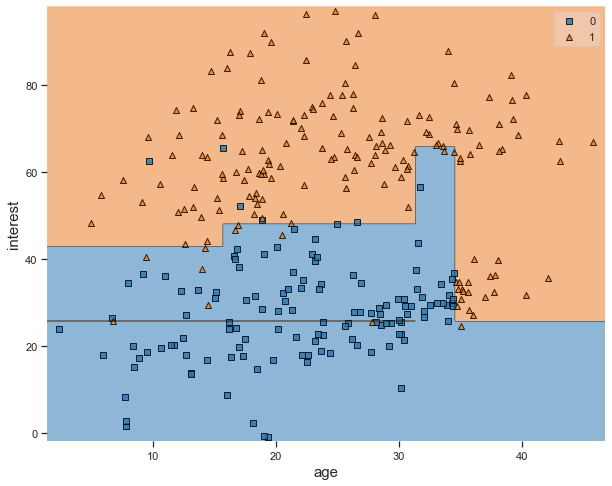

In [30]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = ada_clf)
plt.xlabel("age", fontsize = 15)
plt.ylabel("interest", fontsize = 15)
plt.grid()
plt.show()

This decision region plot is really different from those generated by the bagging and random forests model.